## Programming for Psychologists (2024/2025)

# Home Assignment: fMRI Data Visualisation - Alzheimer's Disease

**Author:** Lucie Sophie Kloss  
**Date:** December 7, 2024  

Neurosynth link to download the functional and anatomical MRI data: [Alzheimer's Disease](https://neurosynth.org/analyses/terms/alzheimer%20disease/) 

---

This is my submission for the fMRI data visualisation assignment. The goal was to load and analyse fMRI data, visualise it effectively, and document the process in a structured way. For this assignment, I decided to visualise Alzheimer's Disease fMRI data, since dementia is my main field of interest. All code decisions are explained below.


**Attention**: To ensure this code works, place the downloaded functional and anatomical MRI data files in <u>one folder</u> with the current Jupyter Notebook file. 

## Step 1: Import All Necessary Libraries, Packages, and Modules
To start, I imported all necessary Python libraries, packages and modules, ensuring that the code runs smoothly and effectively. Each tool serves a specific purpose: 
- `nilearn` for neuroimaging visualisation.
- `nibabel` to load and process the neuroimaging files.
- `matplotlib` for creating custom visualisation. 
- `os` and `glob` to automate file localisation and management.
- `numpy` for numerical operations.

In [70]:
import nilearn
import nibabel as nib
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

## Step 2: Locating Functional and Anatomical Data File

The next step was to automate locating the required neuroimaging files. The goal was to ensure that both the functional and anatomical data files are found without hardcoding the file paths. 

To achieve this, I created a **custom function** that finds files based on their name or a fallback search term. This method ensure **flexibility** when file names are altered and makes the code **reusable** with data files. Additionally, to control the output, I made sure to print the ouput of both file searches.

After defining it, the function was used to identify the following files:
- a **functional data file** containing statistical results from neuroimaging analyses related to brain regions involved in Alzheimer's disease 
- and a **structural MRI data file** containing a structural MRI scan for overlaying the functional data

If either file was not found, the function raises an error with instructions that aim to help resolve the issue. 

In [71]:
# Create a function that automatically locates files based on they name or a fallback_searchterm
def locate_file(filename, fallback_searchterm=None, directory=os.getcwd()):
    """
    Locates files automatically based on their filename or a fallback search term.
    Args:
        filename (str): Name of the file to search for.
        fallback_searchterm (str): Optional term to use as a fallback search criterion.
        directory (str): Directory to search within. Defaults to the current working directory.
    Returns:
        str: Path to the located file.
    Raises:
        FileNotFoundError: If no file is found matching the criteria.
    """

    # As default, search file with file name using glob
    search_path = os.path.join(directory, filename)  # Create a search path using os
    file_list = glob.glob(
        search_path
    )  # Find file on computer by feeding search path into glob

    # If file path is found using file name
    if file_list:
        return file_list[0]  # Return the first match
    # If file is not found using filename use search term as backup
    elif fallback_searchterm:
        fallback_search_path = os.path.join(
            directory, f"*{fallback_searchterm}*"
        )  # Addition of wildcards to find all files with the search term
        fallback_file_list = glob.glob(fallback_search_path)
        if fallback_file_list:
            return fallback_file_list[
                0
            ]  # If file path is found using search term return first match
    # Raise error if both the filename and searchterm do not yield a result
    else:
        raise FileNotFoundError(
            f"No file matching '{filename}' or found in {directory}. "
            "Ensure the necessary file is downloaded and named correctly."
        )

# Use function to get functional data path
functional_data_path = locate_file(
    "alzheimer disease_uniformity-test_z_FDR_0.01.nii.gz",
    fallback_searchterm="alzheimer",
)
print(f"Functional data: {functional_data_path}")

# Use function to get MRI data path
anatomical_data_path = locate_file(
    "anatomical.nii.gz", fallback_searchterm="anatomical"
)
print(f"Structural MRI data: {anatomical_data_path}")

Functional data: /Users/astridbosten/Desktop/Pycourse Assignment/alzheimer disease_uniformity-test_z_FDR_0.01.nii.gz
Structural MRI data: /Users/astridbosten/Desktop/Pycourse Assignment/anatomical.nii.gz


## Step 3: Visualizing Functional Data Overlay

Next, I visualised the functional data overlayed on an structural MRI scan using `nilearn`'s `plot_stat_map` function. 

Based on the instructions, I included the following customisations:
- **Colormap:** I chose "magma" as a colourmap for its perceptually uniform yet visually appealing gradient, ensuring suitability for color blindness while still displaying the data nicely.
- **Voxel Threshold:** As instructed, the threshold was set to only include values above 0.1 excluding lower-intensity voxels.
- **Cut Coordinates:** I selected specific cut coordinates to showcase the main area of interest in Alzheimer's Disease: The hippocampus.
- **Title Costumisation:** I took the artistic freedom to manually add a title instead of using the inbuild function to make it more coherent with the rest of the figure.



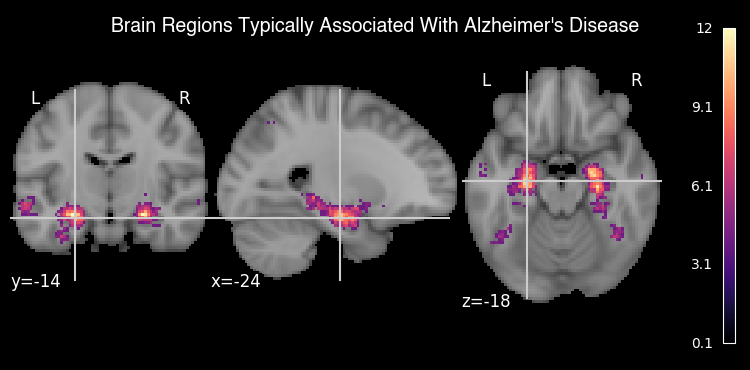

In [72]:
# Import the plotting function from nilearn
from nilearn import plotting

# Plot functional data onto the anatomical scan
display = plotting.plot_stat_map(
    functional_data_path,
    bg_img=anatomical_data_path,
    title=None,  # In order to costumise the text like I wanted to I needed to overlay it onto the image using plt
    cmap="magma",  # Adjust colour map
    threshold=0.1,  # Set minimum threshold for data
    vmin=0.1,  # Set minimum threshold for colour bar
    cut_coords=(-24, -14, -18),  # Custom cut coordinates
)

# Access image trough plt to customise the title
fig = display.frame_axes.figure

# Add a custom title with adjusted text and background colour to make image more uniform
fig.suptitle(
    "Brain Regions Typically Associated With Alzheimer's Disease",  # Title text
    fontsize=14,  # Font size
    color="white",  # Text colour
    backgroundcolor="black",  # Background colour
    fontname="Helvetica",  # Text font
)

# Display the final figure
plotting.show()

## Step 4: Plotting the Histogram of Intensity Values

Finally, I created a histogram to visualise the distribution of the positive intensity values in the functional MRI data. 

To enhance the interpretability of the histogram I made the following customisations: 
- Set the **colour** of the histogram to be the same magma colourmap I used for the overlay visualisation to maintain consistency.
- Add a **colour bar** to link intensity values with their corresponding colours and make the colour gradiant more intuitive. 
- Include **labels** and **gridlines** to improve readibility and cap the y-axis to not distort the data. 

The final visualisation provides a detailed look at the frequency of voxels per intensity value. 

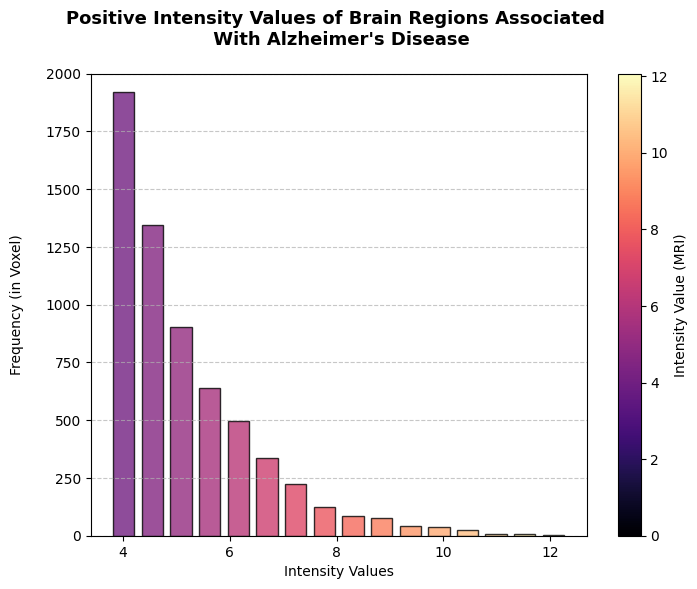

In [73]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Load the functional MRI data and extract intensity data
func_imag = nib.load(functional_data_path)  # Downloads data into memory
data = (
    func_imag.get_fdata()
)  # Extracts raw intensity data from file to convert it into numpy array

# Filter positive values from data
positive_values = data[data > 0]

# Create a normalized colormap
cmap = (
    plt.cm.magma
)  # Use the same colormap as in the MRI plot to colour the bars to enhance consistency and interpretability
norm = Normalize(
    vmin=data.min(),
    vmax=data.max(),
)  # Normalize to full MRI data range to later match each unqiue value to a specific colour

# Identify all unique intensity values in tha data set (x-axis) and calculate their frequencies (y-axis)
unique_values, frequencies = np.unique(positive_values, return_counts=True)

# Map intensity values to colors
colors = cmap(
    norm(unique_values)
)  # Normalises the unique intensity values in order to matches each value with a correpsonding color in the colour map

# Create a figure and plot the histogram
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(
    unique_values, frequencies, color=colors, edgecolor="black", alpha=0.8, width=0.4
)  # Plot unique values on x-axis and frequencies on y-axis and use the earlier adjusted colourmap to colour the bars. I also adjusted the width of the bars to not overlap for better visualisation.

# Add labels, title and gridlines
ax.set_title(
    "Positive Intensity Values of Brain Regions Associated \n With Alzheimer's Disease\n",
    fontweight="bold",
    fontsize=13,
)
ax.set_xlabel("Intensity Values")
ax.set_ylabel(
    "Frequency (in Voxel)\n"
)  # I tried to specify that the freuqncy indicates the number of voxels per intensity value (range)
ax.grid(
    axis="y",
    linestyle="--",
    alpha=0.7,
)  # I added gridlines to make the graph easier to read

# Adjust limit of the y-axis
ax.set_ylim(
    0, 2000
)  # Without specification the limit was set higher than 2000 to an non-displayed number so again for visualisation purposes I manually set it to 2000

# Add a color bar
sm = ScalarMappable(
    cmap=cmap, norm=norm
)  # Links the colourmap and normalisation to the data for consistent colouring
sm.set_array([])  # Requirement for ScalarMappable to work
cbar = fig.colorbar(
    sm, ax=ax, orientation="vertical", label="Intensity Value (MRI)"
)  # Adds a vertical colour bar to the figure that corresponds to the colour map of the histogram and MRI. I decided to do this to again aid in understanding the figure and the connection to the MRI scan.

# Show the plot
plt.show()